<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/last.csv"
data = pd.read_csv(file_path)
data

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Хочу научиться использовать,Компонент знаний,Умею,Не умею,...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,Какое техническое устройство Вы предпочитаете
0,511,0,0,0,0,10,0,0,1,10,...,1,2,1,2,1,2,1,13,4,1
1,593,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,2,0,13,2,1
2,577,0,0,0,0,0,10,0,6,5,...,3,3,2,3,4,2,0,14,3,1
3,557,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,2,1,17,3,1
4,506,0,0,1,0,9,0,10,11,0,...,0,0,0,0,0,0,0,14,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,310,1,0,5,5,0,0,100,9,2,...,0,0,0,0,3,1,1,24,4,2
602,316,1,9,1,0,0,0,100,8,3,...,4,3,4,4,2,4,0,24,4,2
603,77,1,1,1,8,0,0,100,6,5,...,2,0,1,1,4,4,0,25,5,2
604,272,1,0,0,10,0,0,100,11,0,...,3,2,2,2,4,3,0,25,4,2


In [ ]:
# describe the data

data.describe()

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,0.537786,1.253076,2.702988,4.826011,0.861160,87.820738,9.050967,1.949033,82.282460,...,2.388401,1.414763,1.71529,1.456942,3.045694,2.427065,0.284710,17.987698,3.681898,1.609842
std,164.400426,0.499009,2.091043,2.098291,2.899665,1.149121,14.685537,2.151613,2.151613,19.560051,...,1.229883,1.410546,1.43269,1.347399,1.060504,1.244158,0.451673,2.875012,0.840673,0.583495
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,0.000000,18.180000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000
25%,143.000000,0.000000,0.000000,1.000000,3.000000,0.000000,80.000000,8.000000,0.000000,72.730000,...,1.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,16.000000,3.000000,1.000000
50%,285.000000,1.000000,0.000000,2.000000,5.000000,0.000000,90.000000,10.000000,1.000000,90.910000,...,3.000000,1.000000,2.00000,1.000000,3.000000,2.000000,0.000000,18.000000,4.000000,2.000000
75%,427.000000,1.000000,2.000000,4.000000,7.000000,1.000000,100.000000,11.000000,3.000000,100.000000,...,3.000000,2.000000,3.00000,2.000000,4.000000,3.000000,1.000000,20.000000,4.000000,2.000000
max,569.000000,1.000000,10.000000,10.000000,10.000000,7.000000,100.000000,11.000000,9.000000,100.000000,...,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,1.000000,26.000000,5.000000,3.000000


In [4]:
# variable names

data.keys()

Index(['№', 'Студенты (1)школьники(0)',
       'Использую для учебных и образовательных целей',
       'Использую в целях, не связанных с обучением или образованием',
       'Использую и для учебных, и для не учебных целей', 'Не использую',
       'Хочу научиться использовать', 'Компонент знаний', 'Умею', 'Не умею',
       'Компонент ответственности (обеспечения безопасности) ',
       'Использую для учебных и образовательных целей.1',
       'Использую в целях, не связанных с обучением или образованием.1',
       'Использую и для учебных и для неучебных целей', 'Не использую.1',
       'Компонент умений', 'Контент 6 (1,2,4,5,8,20)',
       'Коммуникация 7 (7,11,13, 16,17,19,23)',
       'Техносфера 6 (9,10,14,15,18,22)', 'Потребление 6 (3,6,12,21,24,25)',
       '1. Для развлечения, отдыха', '2. Для общения', '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
       '1. Поиск готовых решений и ответов, выполненных заданий',
       '2. Поиск доп

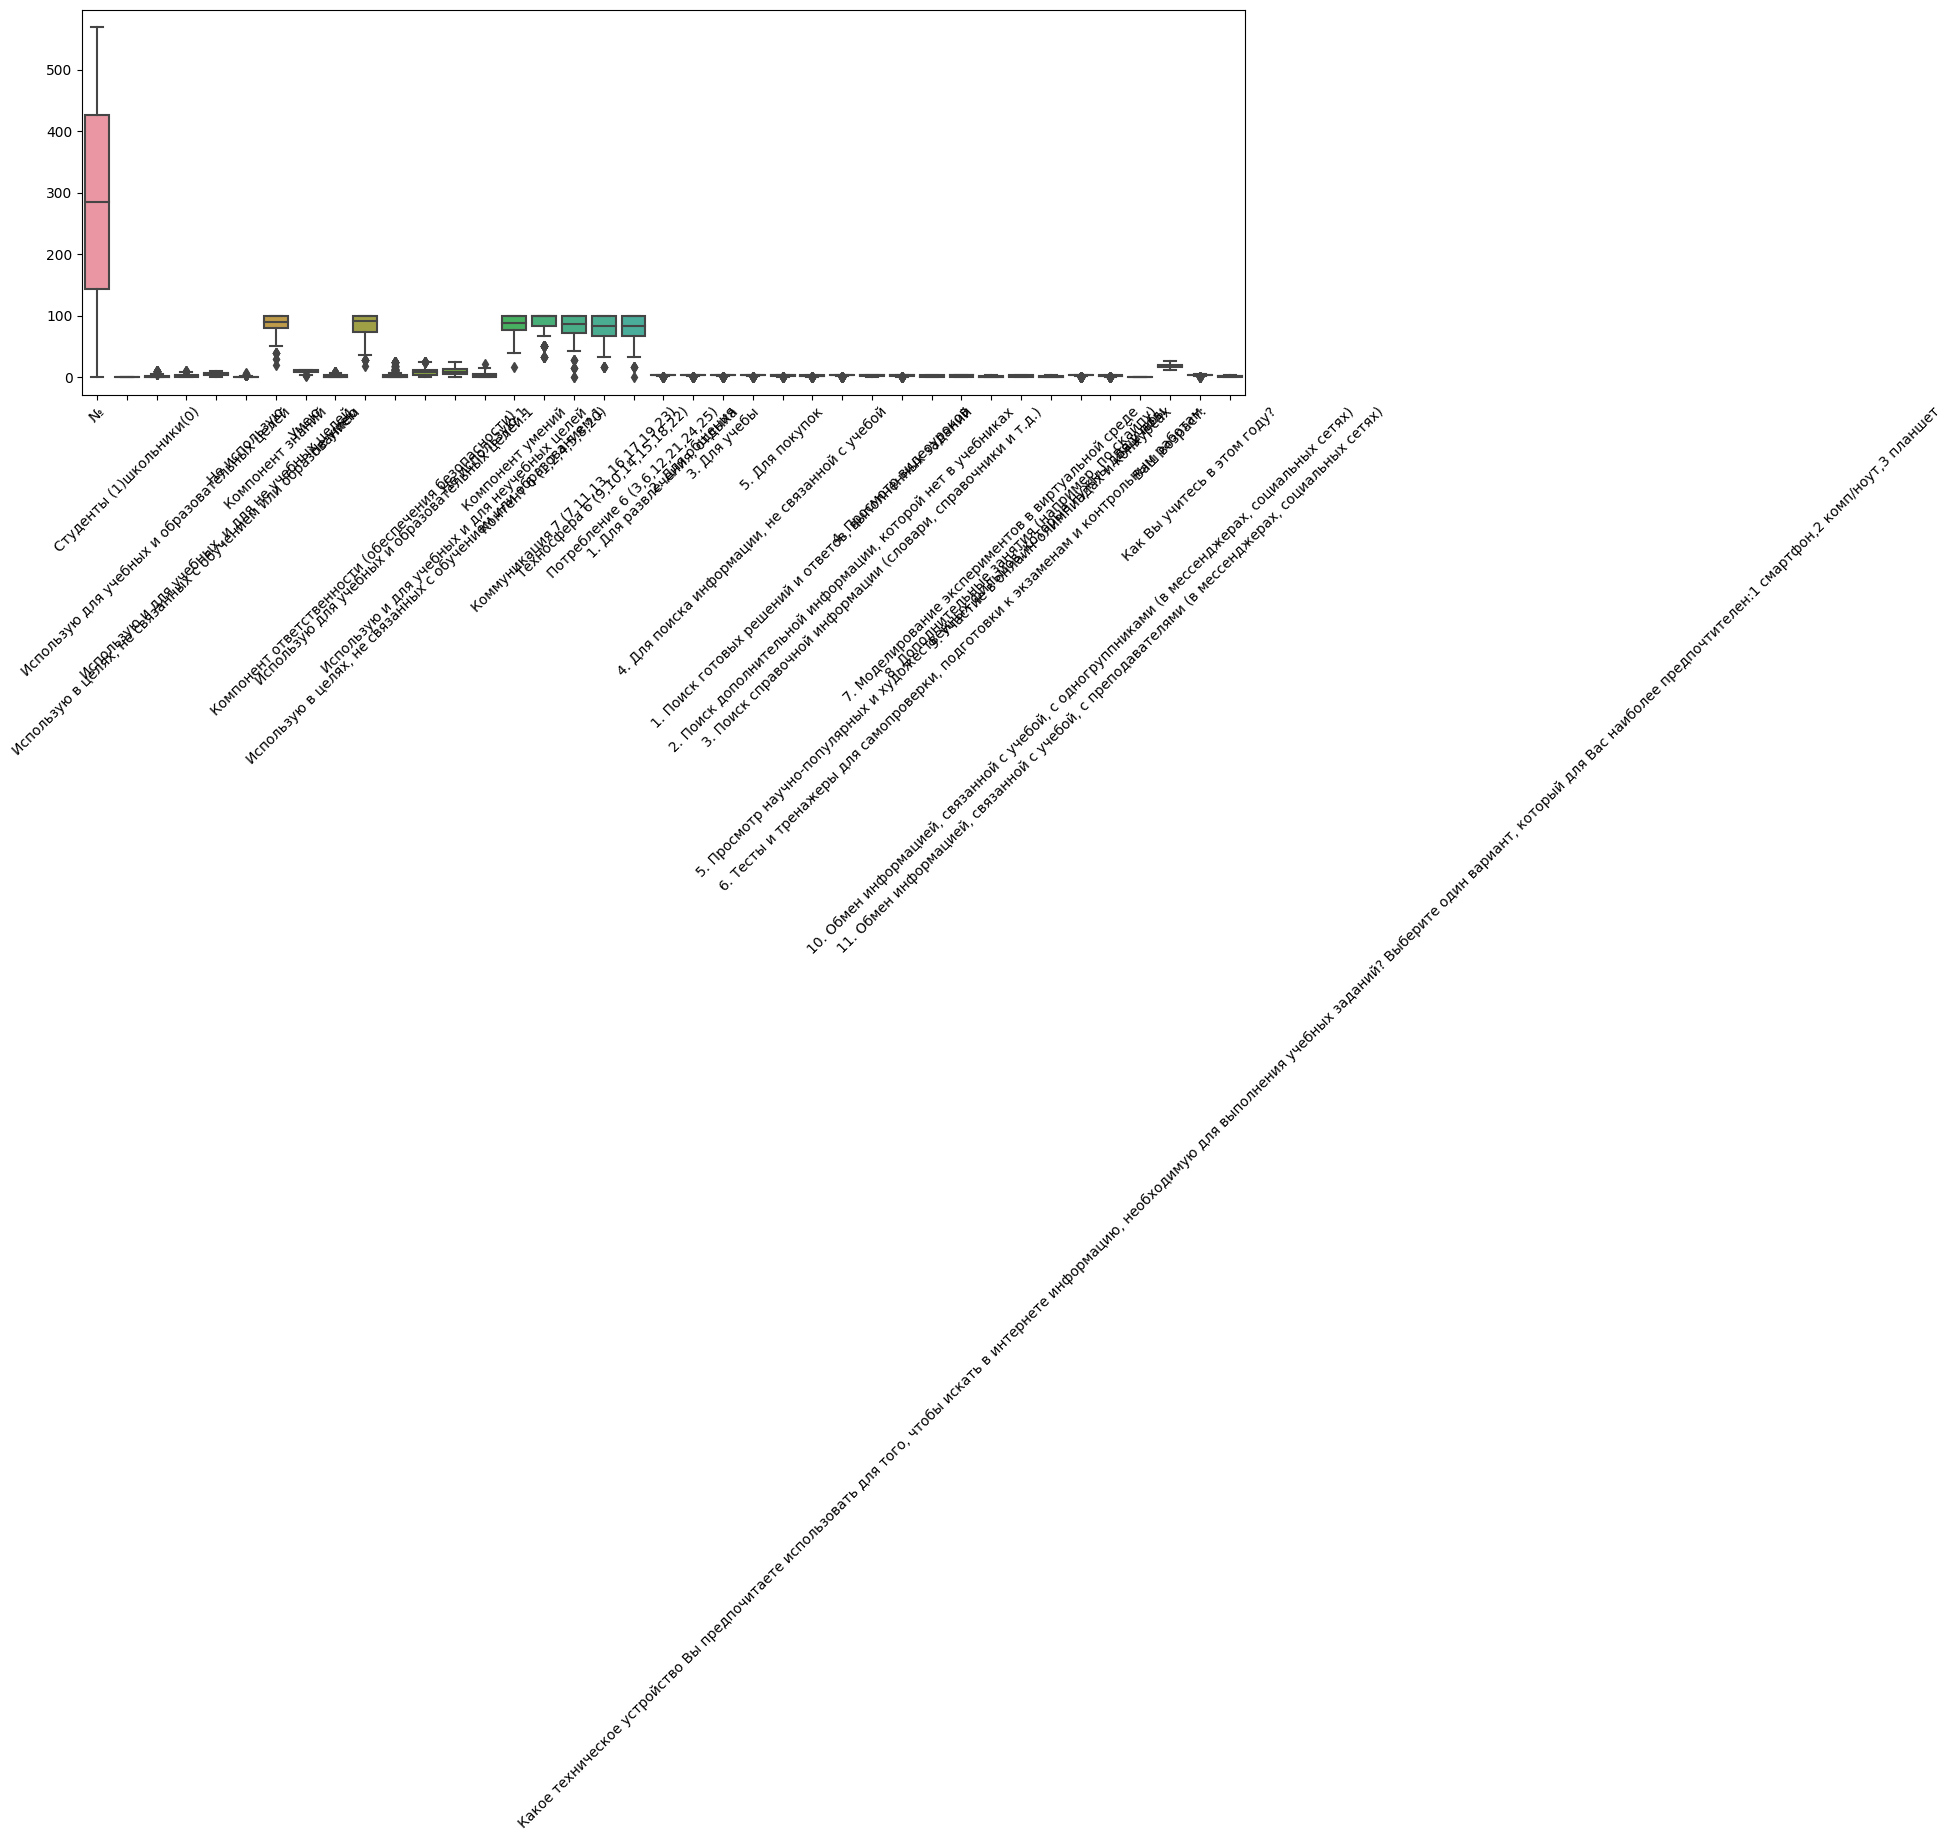

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

# Logistic regression

In [5]:
import statsmodels.api as sm

In [13]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data['Студенты (1)школьники(0)'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data['Студенты (1)школьники(0)'] > binthresh
data


,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Хочу научиться использовать,Компонент знаний,Умею,Не умею,...,7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,Какое техническое устройство Вы предпочитаете,binquality
0,511,0,0,0,0,10,0,0,1,10,...,2,1,2,1,2,1,13,4,1,False
1,593,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,0,13,2,1,False
2,577,0,0,0,0,0,10,0,6,5,...,3,2,3,4,2,0,14,3,1,False
3,557,0,0,0,0,10,0,0,11,0,...,2,2,2,2,2,1,17,3,1,False
4,506,0,0,1,0,9,0,10,11,0,...,0,0,0,0,0,0,14,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,310,1,0,5,5,0,0,100,9,2,...,0,0,0,3,1,1,24,4,2,True
602,316,1,9,1,0,0,0,100,8,3,...,3,4,4,2,4,0,24,4,2,True
603,77,1,1,1,8,0,0,100,6,5,...,0,1,1,4,4,0,25,5,2,True
604,272,1,0,0,10,0,0,100,11,0,...,2,2,2,4,3,0,25,4,2,True


In [16]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality



xcols = []


for key in data.keys():
  if key in [
      ####'Использую для учебных и образовательных целей',
       'Использую в целях, не связанных с обучением или образованием',
       'Использую и для учебных, и для не учебных целей',
       #'Не использую','Хочу научиться использовать',
       #'Компонент знаний',
       #'Умею', 'Не умею',
       'Компонент ответственности (обеспечения безопасности) ',
       #'Использую для учебных и образовательных целей.1',
       'Использую в целях, не связанных с обучением или образованием.1',
       'Использую и для учебных и для неучебных целей',
       #'Не использую.1',
       ###'Компонент умений',
       #'Контент 6 (1,2,4,5,8,20)', 'Коммуникация 7 (7,11,13, 16,17,19,23)',
       'Техносфера 6 (9,10,14,15,18,22)',
       'Потребление 6 (3,6,12,21,24,25)',
       ####'1. Для развлечения, отдыха',
       ####'2. Для общения',
       '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой',
       ####'5. Для покупок',
       ####'1. Поиск готовых решений и ответов, выполненных заданий',
       ####'2. Поиск дополнительной информации, которой нет в учебниках',
       '3. Поиск справочной информации (словари, справочники и т.д.)',
       '4. Просмотр видеоуроков',
       '5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
       '6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
       '7. Моделирование экспериментов в виртуальной среде',
       ####'8. Дополнительные занятия (например, по скайпу)',
       '9. Участие в онлайн-олимпиадах и конкурсах',
       ####'10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
       ####'11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)',
       ##'Ваш пол:',
       ###'Ваш возраст:',
       ###'Как Вы учитесь в этом году?',
       ##'Какое техническое устройство Вы предпочитаете',
]:
                     xcols.append(key)

xcols

['Использую в целях, не связанных с обучением или образованием',
 'Использую и для учебных, и для не учебных целей',
 'Компонент ответственности (обеспечения безопасности) ',
 'Использую в целях, не связанных с обучением или образованием.1',
 'Использую и для учебных и для неучебных целей',
 'Техносфера 6 (9,10,14,15,18,22)',
 'Потребление 6 (3,6,12,21,24,25)',
 '3. Для учебы',
 '4. Для поиска информации, не связанной с учебой',
 '3. Поиск справочной информации (словари, справочники и т.д.)',
 '4. Просмотр видеоуроков',
 '5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
 '6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
 '7. Моделирование экспериментов в виртуальной среде',
 '9. Участие в онлайн-олимпиадах и конкурсах']

In [17]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.494163
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                  606
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                           14
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.2826
Time:                        17:51:07   Log-Likelihood:                -299.46
converged:                       True   LL-Null:                       -417.46
Covariance Type:            nonrobust   LLR p-value:                 2.251e-42
=======================================================================================================================================================
                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Использую в целях, не связанных с обучением или образованием                            0.0865      0.065      1.324      0.185      -0.042       0.215
Использую и для учебных, и для не учебных целей                                         0.0999      0.051      1.955      0.051      -0.000       0.200
Компонент ответственности (обеспечения безопасности)                                   -0.0148      0.005     -2.833      0.005      -0.025      -0.005
Использую в целях, не связанных с обучением или образованием.1                          0.0215      0.028      0.757      0.449      -0.034       0.077
Использую и для учебных и для неучебных целей                                           0.0547      0.025      2.179      0.029       0.006       0.104
Техносфера 6 (9,10,14,15,18,22)                                                        -0.0322      0.006     -5.136      0.000      -0.044      -0.020
Потребление 6 (3,6,12,21,24,25)                                                         0.0145      0.006      2.382      0.017       0.003       0.026
3. Для учебы                                                                            0.6870      0.148      4.653      0.000       0.398       0.976
4. Для поиска информации, не связанной с учебой                                        -0.1363      0.133     -1.023      0.307      -0.397       0.125
3. Поиск справочной информации (словари, справочники и т.д.)                            0.2849      0.121      2.359      0.018       0.048       0.522
4. Просмотр видеоуроков                                                                -0.3049      0.117     -2.606      0.009      -0.534      -0.076
5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы         0.6706      0.112      5.968      0.000       0.450       0.891
6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам    -0.5002      0.109     -4.602      0.000      -0.713      -0.287
7. Моделирование экспериментов в виртуальной среде                                     -0.0658      0.096     -0.684      0.494      -0.254       0.123
9. Участие в онлайн-олимпиадах и конкурсах                                             -0.3168      0.097     -3.274      0.001      -0.506      -0.127
=======================================================================================================================================================
"""

In [ ]:
! pip install matplotlib seaborn pandas


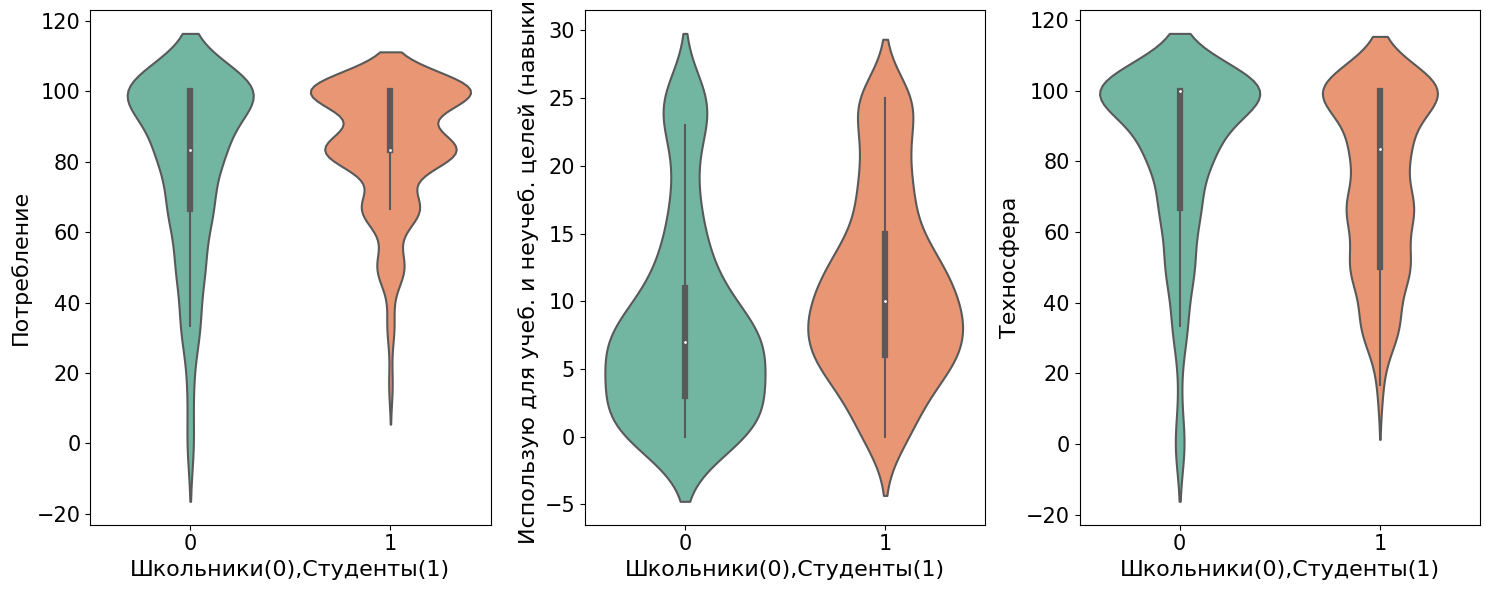

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Потребление 6 (3,6,12,21,24,25)'], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Потребление", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Использую и для учебных и для неучебных целей'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Использую для учеб. и неучеб. целей (навыки)", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Техносфера 6 (9,10,14,15,18,22)'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Техносфера", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

plt.tight_layout()
plt.show()





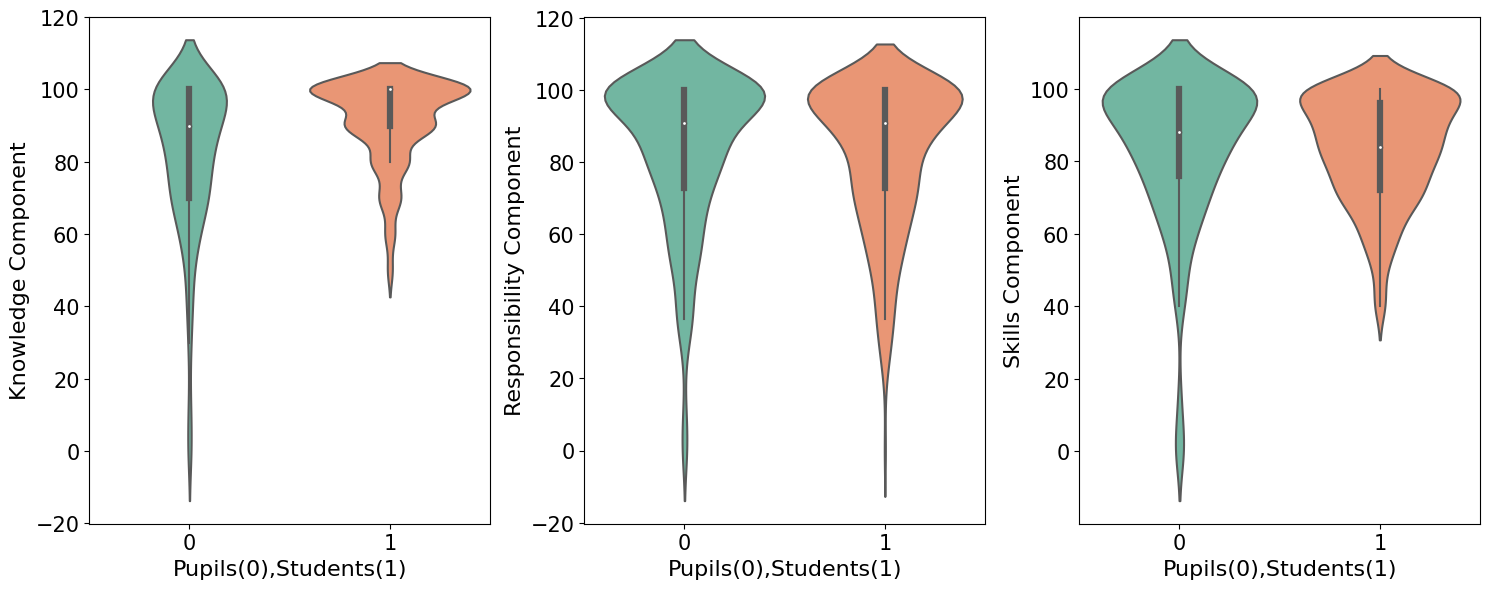

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент знаний'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Knowledge Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Responsibility Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент умений'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Skills Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


plt.tight_layout()
plt.show()


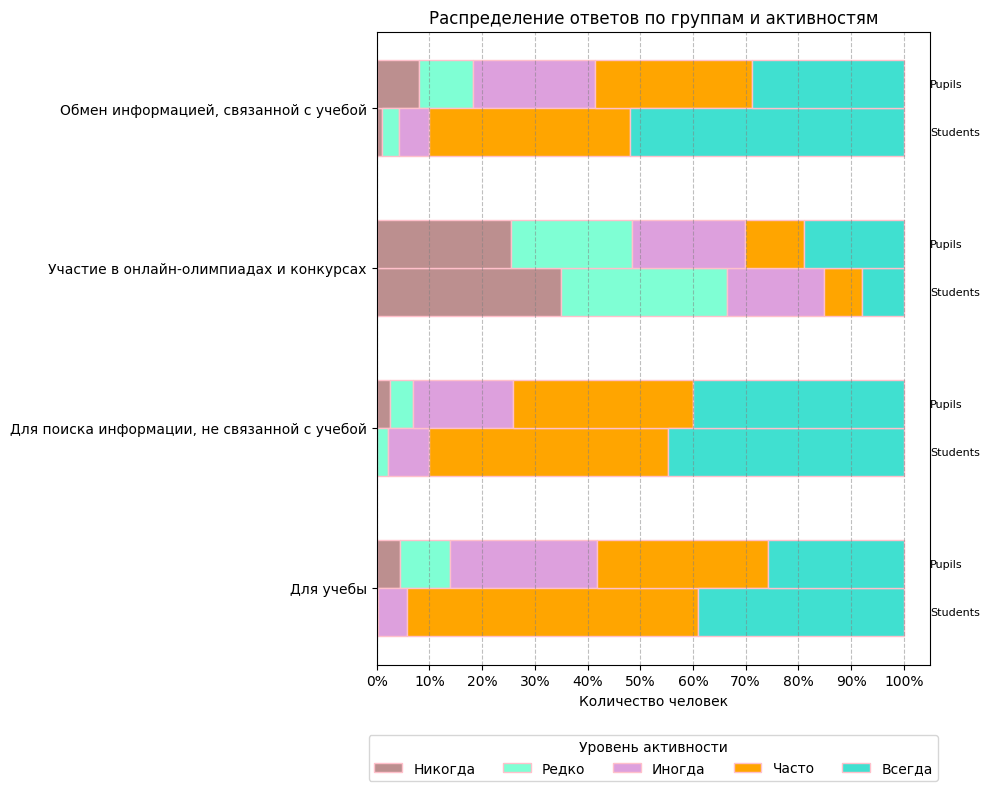

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
activities = [
    'Для учебы',
    'Для поиска информации, не связанной с учебой',
    'Участие в онлайн-олимпиадах и конкурсах',
    'Обмен информацией, связанной с учебой'
]

response_labels = ["Никогда", "Редко", "Иногда", "Часто", "Всегда"]
response_colors = ["rosybrown", "aquamarine", "plum", "orange", "turquoise"]

responses_students = np.array([
    [0.00, 0.30, 5.44, 55.29, 38.97	],
    [0.00, 2.11, 7.85, 45.32, 44.71	],
    [35.05, 31.42, 18.43, 7.25, 7.85],
    [0.91, 3.32, 5.74, 38.07, 51.96],
])

responses_schoolchildren = np.array([
    [4.36, 9.45, 28.00, 32.36, 25.82],
    [2.55, 4.36, 18.91, 34.18, 40.00	],
    [25.45, 22.91, 21.45, 11.27, 18.91	],
    [8.00, 10.18, 23.27, 29.82, 28.73],
])

y = np.arange(len(activities))  # the label locations
height = 0.30 # adjust the height to reduce the space between activity labels
border_color = "pink"  # color for the border of each bar

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here (e.g., figsize=(8, 10))

for i, color in enumerate(response_colors):
    left1 = np.sum(responses_students[:, :i], axis=1)
    left2 = np.sum(responses_schoolchildren[:, :i], axis=1)

    rects1 = ax.barh(y - height/2, responses_students[:, i], height, left=left1, label=response_labels[i], color=color, edgecolor=border_color)
    rects2 = ax.barh(y + height/2, responses_schoolchildren[:, i], height, left=left2, color=color, edgecolor=border_color)

ax.set_xlabel('Количество человек')
ax.set_title('Распределение ответов по группам и активностям')
ax.set_yticks(y)
ax.set_yticklabels(activities)
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])

for percent in np.linspace(0, 100, 11):
    ax.axvline(x=percent, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


#ax.set_xticks(np.arange(0, 101, 20))
#ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
#ax.legend(title="Уровень активности")
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=5)

# Add labels on the side near bars
for j in range(len(activities)):
    ax.text(105, y[j] - height/2, "Students", ha='left', va='center', color='black', fontsize=8)
    ax.text(105, y[j] + height/2, "Pupils", ha='left', va='center', color='black', fontsize=8)

# Adjust the bbox_to_anchor parameter to bring the legend title closer
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=5)


fig.tight_layout()

plt.show()


In [ ]:
# Define the binary variable
binary_variable = 'Студенты (1)школьники(0)'

# Define the Likert scale variables you want to analyze
likert_scale_variables = [
    '3. Для учебы',
    '4. Для поиска информации, не связанной с учебой',
    '9. Участие в онлайн-олимпиадах и конкурсах',
    '10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)'
]

# Create a DataFrame to store the results
results = pd.DataFrame()

# Iterate through the Likert scale variables and calculate percentages based on the binary variable
for variable in likert_scale_variables:
    # Group the data by the binary variable and calculate the value counts for each group
    grouped_data = data.groupby([binary_variable, variable]).size().unstack(fill_value=0)

    # Calculate the percentages for each group
    percentages = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).round(2)

    # Rename the columns for clarity
    percentages.columns = [f'{variable} ({i})' for i in percentages.columns]

    # Store the percentages in the results DataFrame
    results = pd.concat([results, percentages], axis=1)

# Display the results DataFrame as a table
results


,3. Для учебы (0),3. Для учебы (1),3. Для учебы (2),3. Для учебы (3),3. Для учебы (4),"4. Для поиска информации, не связанной с учебой (0)","4. Для поиска информации, не связанной с учебой (1)","4. Для поиска информации, не связанной с учебой (2)","4. Для поиска информации, не связанной с учебой (3)","4. Для поиска информации, не связанной с учебой (4)",9. Участие в онлайн-олимпиадах и конкурсах (0),9. Участие в онлайн-олимпиадах и конкурсах (1),9. Участие в онлайн-олимпиадах и конкурсах (2),9. Участие в онлайн-олимпиадах и конкурсах (3),9. Участие в онлайн-олимпиадах и конкурсах (4),"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях) (0)","10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях) (1)","10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях) (2)","10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях) (3)","10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях) (4)"
Студенты (1)школьники(0),,,,,,,,,,,,,,,,,,,,
0,4.36,9.45,28.00,32.36,25.82,2.55,4.36,18.91,34.18,40.00,25.45,22.91,21.45,11.27,18.91,8.00,10.18,23.27,29.82,28.73
1,0.00,0.30,5.44,55.29,38.97,0.00,2.11,7.85,45.32,44.71,35.05,31.42,18.43,7.25,7.85,0.91,3.32,5.74,38.07,51.96
